In [1]:
%cd ..

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf
import warnings

from quantipy.assets import Currency, Equity
from quantipy.trading import Broker, BuyAndHold
from quantipy.backtest import Backtester
import quantipy.utils as _utils

%matplotlib inline
warnings.filterwarnings('ignore')

# backtest period
BACKTEST_START = '2016-01-01'
LIVE_START = '2019-01-01'

# trading universe
CAPITAL = 10_000
usd = Currency('USD')
spy = Equity('SPY', 'SPY')
nvda = Equity('NVDA', 'NVDA')
MKT = [spy, nvda]
BENCHMARK = 'SPY'

# strategy
STRATEGY = BuyAndHold([nvda], {})

/home/luissimaoaf/self/dev/quantipy


In [2]:
# getting data
data = {}
for asset in MKT:
    ticker = yf.ticker.Ticker(asset.symbol)
    ticker_data = ticker.history(start=BACKTEST_START, interval='1d')
    data[asset.symbol] = ticker_data

# no commissions
broker = Broker(data=data, initial_capital=CAPITAL, currency=usd, commission_fixed=0, commission_pct=0)
live_backtester = Backtester(data)

backtest = live_backtester.run(STRATEGY, broker, save_logs=True)

Backtest Results
----------------------------------------
Metric           Strategy      Benchmark
----------------------------------------
Total Return:   16877.58%        223.01%
Avg gain (day):     2.27%          0.72%
Avg loss (day):    -2.13%         -0.76%
Beta (BM):         1.7703              1
Sharpe Ratio:      1.4621         0.8566
Sortino Ratio:     2.2873         1.1973
----------------------------------------
Max Drawdown:     -66.34%        -33.72%
Avg Drawdown:     -15.93%         -4.66%
Avg DD Bars:           16             11
Longest DD:           373            488
----------------------------------------
Time in Market:    99.86%           100%
Trades:                 1
Best Win:       16877.91%
Avg Win:        16877.91%
Worst Loss:         0.00%
Avg Loss:           0.00%
Win/Loss ratio:       inf
Win %:            100.00%


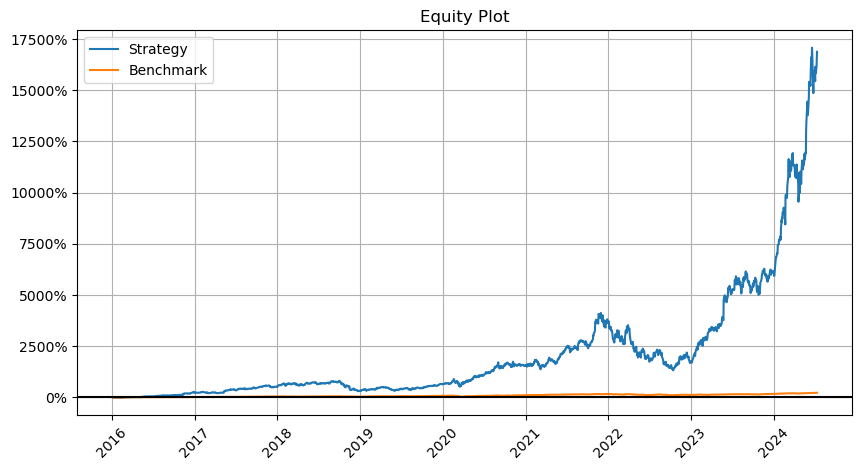

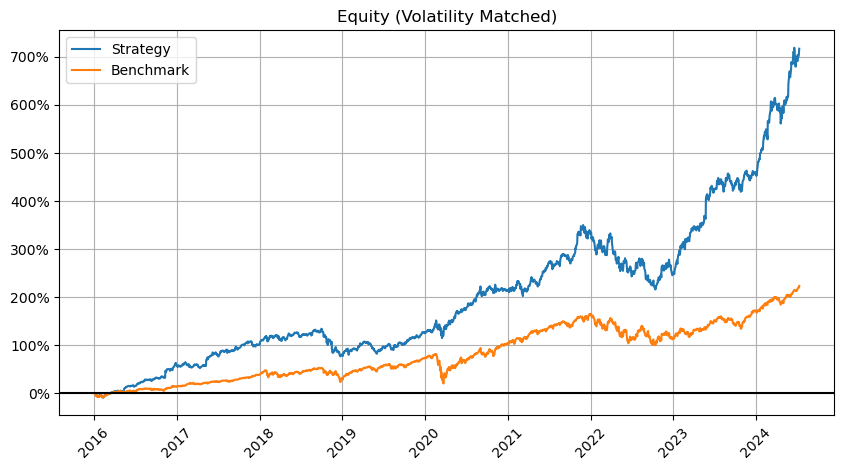

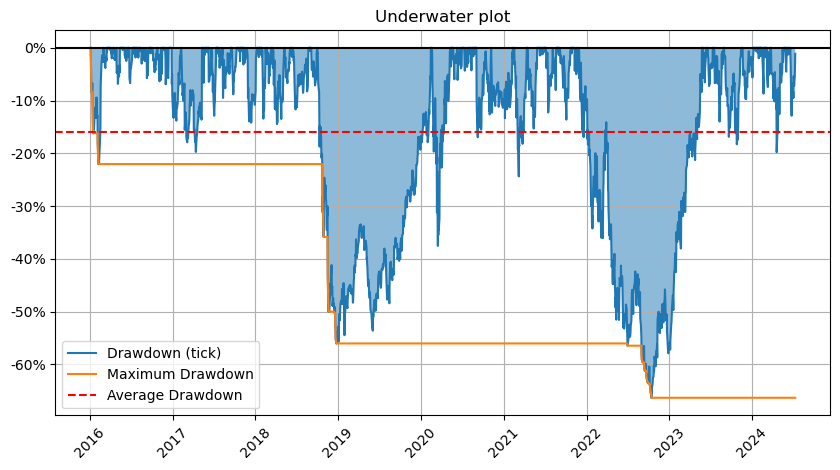

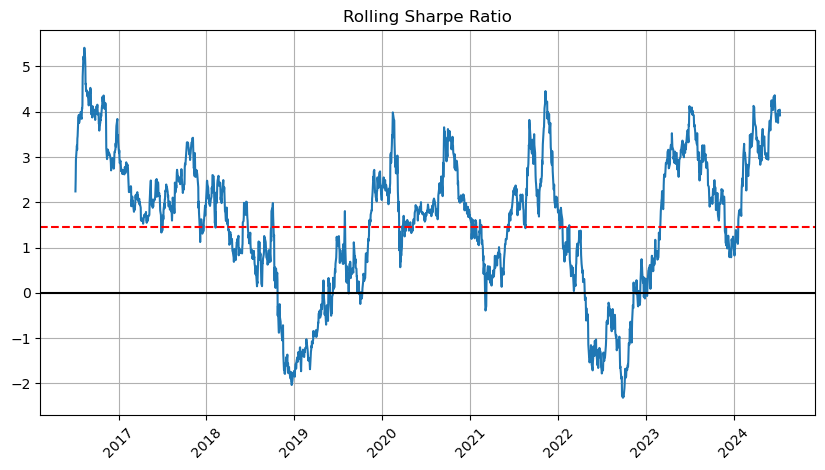

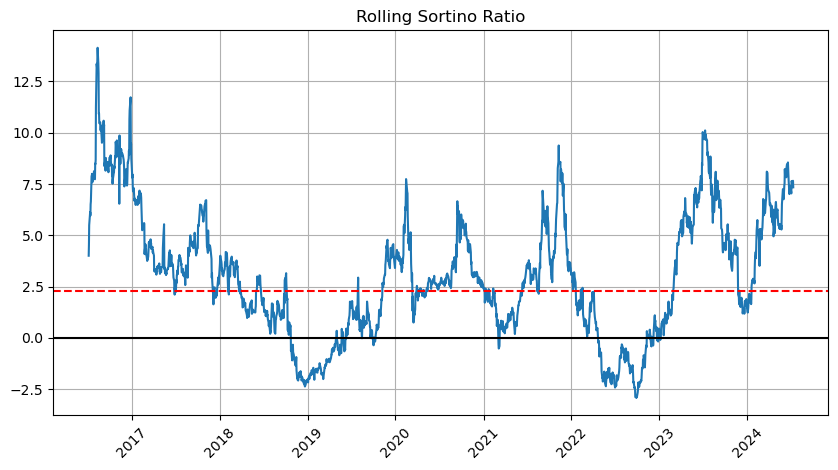

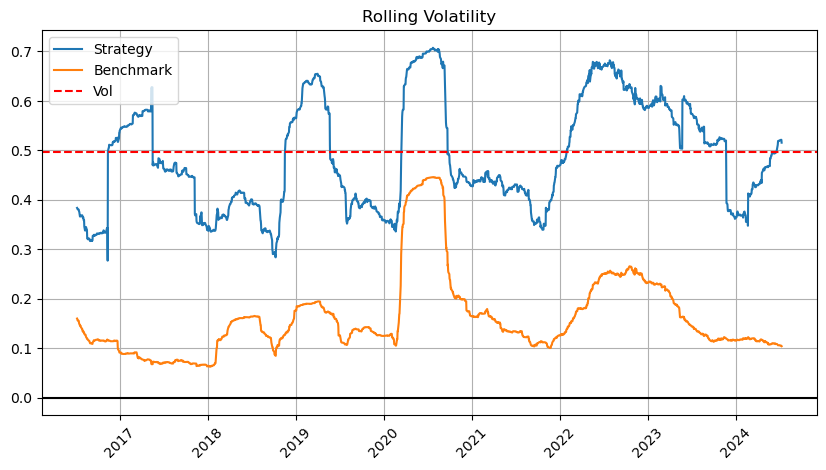

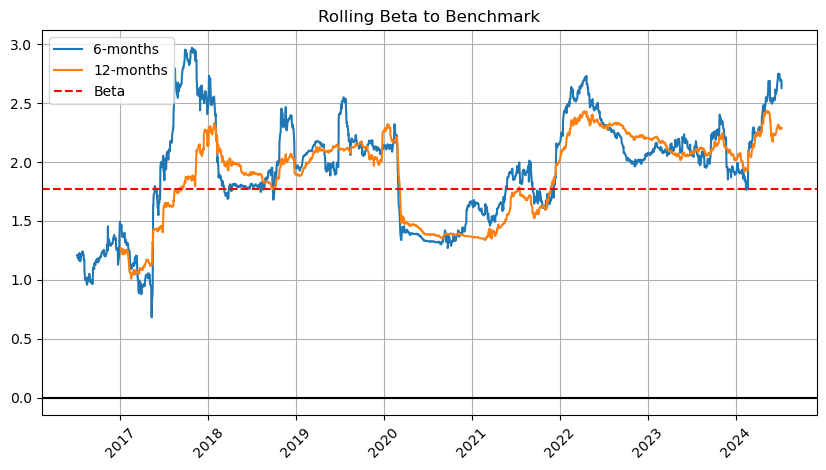

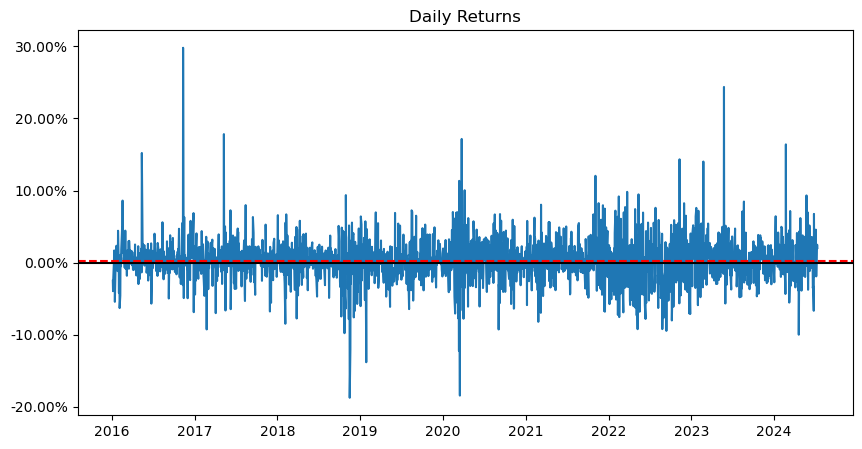

In [3]:
results = live_backtester.process_results(benchmark=BENCHMARK)
live_backtester.show_report()